# %%
#  Plots on selected model 

* model: (50t,600,10)
* scale: 125

In [1]:
import pandas as pd 
import numpy as np
from helpers import potus
import glob
import re
import os

import matplotlib.pyplot as plt
import seaborn as sns

importing helper functions


In [2]:
import imp
imp.reload(potus)

<module 'helpers.potus' from '/mnt/batch/tasks/shared/LS_root/mounts/clusters/ilab2-aj/code/Users/12823819/ilab2/helpers/potus.py'>

## (50t,600,10)

Load results for scales 125 and 25.

In [301]:
exp = 'potus_50t_600_10'
scales = [25]
result = potus.gridExpResult(exp, scales)

print(len(result.df))
print(len(result.settings))
display(result.settings)
display(result.df.groupby('Nw').speech.count())

load lda model from /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/lda.model
load bow from  /home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/bow.pkl
File exists and is readable
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_100_100.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_125_125.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_25_25.pkl
t: 50, Nw: 25, Tw:25
962  before trim
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_50_50.pkl
/home/azureuser/cloudfiles/code/data/processing/potus/experiment/potus_50t_600_10/speeches_dfr_potus_50t_600_10_klds_75_75.pkl
962
1


,kld_filename,topics,Nw,Tw,path
0,speeches_dfr_potus_50t_600_10_klds_25_25.pkl,50,25,25,/home/azureuser/cloudfiles/code/data/processin...


Nw
25    962
Name: speech, dtype: int64

# Prepare ts object


a pandas data frame with a date column set as index. date is converted using `pd.to_datetime`

In [302]:
result.df.date = pd.to_datetime(result.df.date)

In [303]:
ts = result.df[['date', 'file_name', 'speaker', 'title', 'speech', 'novelty', 'transience', 'resonance',  'speech_len', 'probs', 'token_count', 'raw_tuple']].set_index('date')
ts.head()

,file_name,speaker,title,speech,novelty,transience,resonance,speech_len,probs,token_count,raw_tuple
date,,,,,,,,,,,
1789-04-30,washington_speeches_000.txt,washington,First Inaugural Address,Fellow Citizens of the Senate and the House of...,0.000000,1.331562,-1.331562,8687,"[0.00018299, 1.284e-05, 0.01475338, 0.00017441...",1256,"(First Inaugural Address, 1789-04-30, Fellow C..."
1789-10-03,washington_speeches_004.txt,washington,Thanksgiving Proclamation,Whereas it is the duty of all Nations to ackno...,0.347742,1.387929,-1.040186,2541,"[0.00055468, 3.893e-05, 0.00082558, 0.00052866...",960,"(Thanksgiving Proclamation, 1789-10-03, Wherea..."
1790-01-08,washington_speeches_003.txt,washington,First Annual Message to Congress,Fellow Citizens of the Senate and House of Rep...,0.789467,1.202466,-0.412999,5278,"[0.00029236, 2.052e-05, 0.19161724, 0.01777297...",900,"(First Annual Message to Congress, 1790-01-08,..."
1790-12-08,washington_speeches_001.txt,washington,Second Annual Message to Congress,Fellow citizens of the Senate and House of Rep...,1.163939,1.712157,-0.548218,8383,"[0.00017585, 1.234e-05, 0.3299131, 0.01151088,...",271,"(Second Annual Message to Congress, 1790-12-08..."
1790-12-29,washington_speeches_002.txt,washington,Talk to the Chiefs and Counselors of the Senec...,"I the President of the United States, by my ow...",1.920160,2.423603,-0.503444,7898,"[0.00021747, 1.526e-05, 0.05494575, 0.00020727...",607,(Talk to the Chiefs and Counselors of the Sene...


In [304]:
ts.loc['2008-01-01':'2018-12-31']

,file_name,speaker,title,speech,novelty,transience,resonance,speech_len,probs,token_count,raw_tuple
date,,,,,,,,,,,
2008-01-28,gwbush_speeches_032.txt,gwbush,State of the Union Address,"Madam Speaker, Vice President Cheney, members ...",1.748165,2.051343,-0.303178,33649,"[4.038e-05, 2.83e-06, 6.005e-05, 3.848e-05, 9....",3746,"(State of the Union Address, 2008-01-28, Madam..."
2008-03-19,gwbush_speeches_034.txt,gwbush,Remarks on the War on Terror,"Thank you all. Deputy Secretary England, thank...",1.433824,2.953103,-1.519279,18532,"[6.925e-05, 4.86e-06, 0.00010303, 0.00375672, ...",345,"(Remarks on the War on Terror, 2008-03-19, Tha..."
2008-08-28,obama_speeches_002.txt,obama,Acceptance Speech at the Democratic National C...,To Chairman Dean and my great friend Dick Durb...,2.642174,1.928734,0.713440,25901,"[5.656e-05, 3.97e-06, 8.407e-05, 5.391e-05, 0....",595,(Acceptance Speech at the Democratic National ...
2008-10-03,gwbush_speeches_033.txt,gwbush,Remarks on Emergency Economic Stabilization Ac...,"A short time ago, the House of Representatives...",3.339841,2.308997,1.030843,4198,"[0.00029651, 2.081e-05, 0.00044073, 0.0002826,...",561,(Remarks on Emergency Economic Stabilization A...
2008-11-04,obama_speeches_000.txt,obama,Remarks on Election Night,If there is anyone out there who still doubts ...,2.445935,2.056777,0.389158,10517,"[0.00015364, 1.078e-05, 0.00022836, 0.00014643...",547,"(Remarks on Election Night, 2008-11-04, If the..."
2008-11-13,gwbush_speeches_035.txt,gwbush,Speech on Financial Markets and the World Economy,Thank you very much. Please be seated. Thank y...,2.464317,1.763558,0.700760,18279,"[0.04399939, 5.26e-06, 0.00724698, 7.137e-05, ...",354,(Speech on Financial Markets and the World Eco...
2008-12-19,gwbush_speeches_036.txt,gwbush,Remarks on Plan to Assist Automakers,"Good morning. For years, America's automakers ...",3.146432,2.309540,0.836892,6446,"[0.0002141, 1.503e-05, 0.00031847, 0.00020406,...",181,"(Remarks on Plan to Assist Automakers, 2008-12..."
2009-01-12,gwbush_speeches_037.txt,gwbush,Final Press Conference,\n<THE PRESIDENT:> Thank you. Tapper. We have ...,3.645072,3.182389,0.462683,39634,"[0.00600836, 3.06e-06, 6.489e-05, 4.16e-05, 0....",971,"(Final Press Conference, 2009-01-12, \n<THE PR..."
2009-01-15,gwbush_speeches_038.txt,gwbush,Farewell Address to the Nation,"Fellow citizens:\nFor eight years, it has been...",1.613090,1.937509,-0.324420,10668,"[0.00013051, 9.16e-06, 0.00019405, 0.00012439,...",69,"(Farewell Address to the Nation, 2009-01-15, F..."


## now average across all scales to arrive at mean metrics for each speech

In [305]:
many_window_values = ts.pivot_table(index='file_name', values = ['novelty', 'transience', 'resonance'], aggfunc='mean')

ts = ts.drop_duplicates(subset=['file_name'])
ts = ts[['file_name', 'speaker', 'title', 'speech', 'speech_len', 'probs', 'token_count', 'raw_tuple']]
ts['date'] = ts.index

ts = pd.merge(ts,
                 many_window_values,
                 on='file_name', 
                 how='left')
ts = ts.set_index('date')

print(ts.head())


                              file_name     speaker  \
date                                                  
1789-04-30  washington_speeches_000.txt  washington   
1789-10-03  washington_speeches_004.txt  washington   
1790-01-08  washington_speeches_003.txt  washington   
1790-12-08  washington_speeches_001.txt  washington   
1790-12-29  washington_speeches_002.txt  washington   

                                                        title  \
date                                                            
1789-04-30                            First Inaugural Address   
1789-10-03                          Thanksgiving Proclamation   
1790-01-08                   First Annual Message to Congress   
1790-12-08                  Second Annual Message to Congress   
1790-12-29  Talk to the Chiefs and Counselors of the Senec...   

                                                       speech  speech_len  \
date                                                                        
1789

In [306]:
# best that we remove the n speeches at each end, since they do not have complete metrics

n = 25
e = 962-n

df = ts[n:e]

# plots

In [307]:
sns.set(rc={'figure.figsize':(11, 4)})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06e9306940>,
      dtype=object)

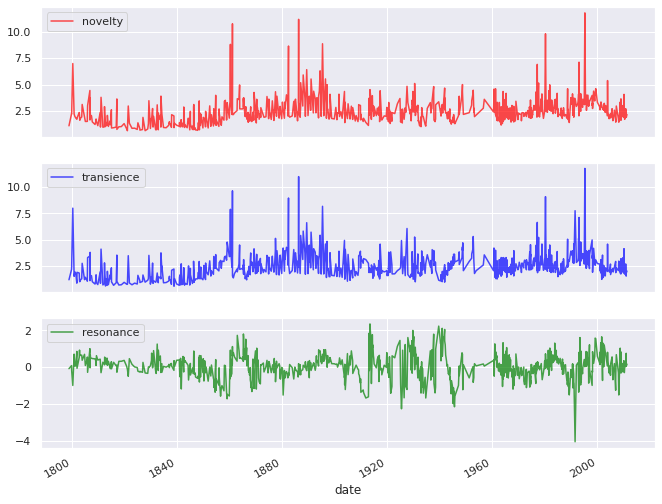

In [311]:
plot_cols = ['novelty', 'transience', 'resonance']
df[plot_cols].plot(
     figsize=(11, 9),
    color=['red', 'blue', 'green'],alpha=0.7,
    subplots=True)

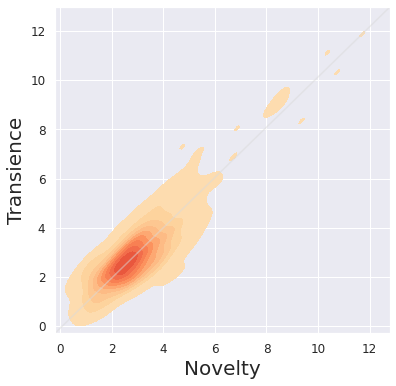

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = plt.cm.get_cmap('OrRd')

# between 0 and 1, 0 for the leftmost color of the range, 1 for the rightmost, upper > lower
upper_color = 1.0
lower_color = 0.2
num_colors =  15 # len(self.data.columns)
colors = cmap(np.linspace(lower_color, upper_color, num_colors))


plt.figure(figsize=(6,6))
b = sns.kdeplot(x=df['novelty'], y=df['transience'], fill=True, colors=colors, thresh=0.015, alpha=1)
b.set_ylabel("Transience",fontsize=20)
b.set_xlabel("Novelty",fontsize=20)
b.tick_params(labelsize=12)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, color = '#dadada', alpha = 0.5)

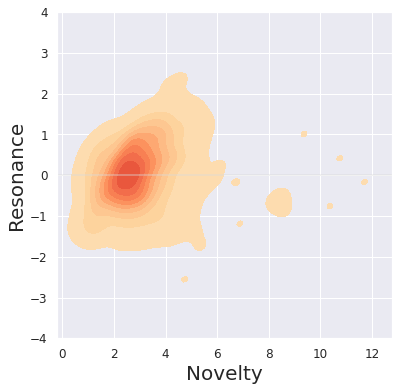

In [293]:
plt.figure(figsize=(6,6))
b = sns.kdeplot(x=df['novelty'], y=df['resonance'], fill=True, colors=colors, thresh=0.015, alpha=1)
b.set_ylabel("Resonance",fontsize=20)
b.set_xlabel("Novelty",fontsize=20)
b.tick_params(labelsize=12)
plt.ylim(-4,4)
y_lim = [0,0]
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, color = '#dadada', alpha = 0.5)

<Figure size 432x432 with 0 Axes>

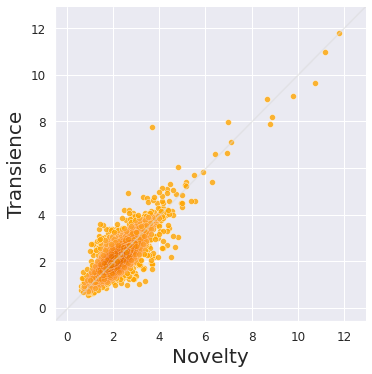

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = plt.cm.get_cmap('Oranges')

# between 0 and 1, 0 for the leftmost color of the range, 1 for the rightmost, upper > lower
upper_color = 1
lower_color = 0.4
num_colors =  15 # len(self.data.columns)
colors = cmap(np.linspace(lower_color, upper_color, num_colors))


plt.figure(figsize=(6,6))
sns.relplot(x='novelty', y='transience', data=df, alpha=0.8, color = 'orange')
b = sns.kdeplot(x=df['novelty'], y=df['transience'], fill=True, colors=colors, thresh=0.3, alpha=0.4)
b.set_ylabel("Transience",fontsize=20)
b.set_xlabel("Novelty",fontsize=20)
b.tick_params(labelsize=12)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, color = '#dadada', alpha = 0.5)


<Figure size 432x432 with 0 Axes>

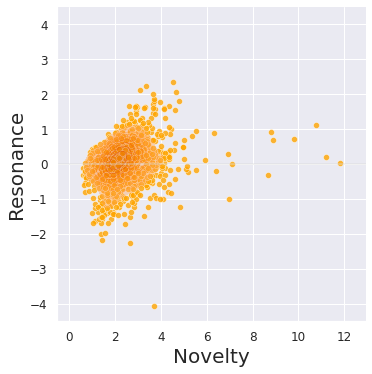

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

cmap = plt.cm.get_cmap('Oranges')

# between 0 and 1, 0 for the leftmost color of the range, 1 for the rightmost, upper > lower
upper_color = 1
lower_color = 0.4
num_colors =  15 # len(self.data.columns)
colors = cmap(np.linspace(lower_color, upper_color, num_colors))


plt.figure(figsize=(6,6))
sns.relplot(x='novelty', y='resonance', data=df, alpha=0.8, color = 'orange')
b = sns.kdeplot(x=df['novelty'], y=df['resonance'], fill=True, colors=colors, thresh=0.3, alpha=0.4)
b.set_ylabel("Resonance",fontsize=20)
b.set_xlabel("Novelty",fontsize=20)
b.tick_params(labelsize=12)
plt.ylim(-4.5,4.5)
y_lim = [0,0]
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, color = '#dadada', alpha = 0.5)


In [322]:
print(df.sort_values('resonance', ascending=False)[:10][['speaker', 'title', 'resonance', 'novelty']])

                speaker                                              title  \
date                                                                         
1913-07-04       wilson                              Address at Gettysburg   
1939-09-03  fdroosevelt              Fireside Chat 14: On the European War   
1940-12-29  fdroosevelt      Fireside Chat 16: On the Arsenal of Democracy   
1941-12-08  fdroosevelt  Address to Congress Requesting a Declaration o...   
1929-10-25       hoover                 Message Regarding “Black Thursday”   
1913-03-04       wilson                            First Inaugural Address   
1865-05-02      johnson  Establishing Rewards for the Arrest of Certain...   
1937-10-05  fdroosevelt                                  Quarantine Speech   
1914-05-30       wilson                               Memorial Day Address   
1863-01-01      lincoln                          Emancipation Proclamation   

            resonance   novelty  
date                         

In [296]:
print(df.sort_values('resonance', ascending=True)[:10][['speaker', 'title', 'resonance', 'novelty']])

              speaker                                              title  \
date                                                                       
1991-07-31       bush            Press Conference with Mikhail Gorbachev   
1977-03-09     carter     Remarks at President Carter's Press Conference   
1879-05-12      hayes             Message Regarding Election Regulations   
1904-02-11  roosevelt               Proclamation Declaring US Neutrality   
1877-07-18      hayes                  Message Regarding Railroad Strike   
1903-10-20  roosevelt    Message Convening a Special Session of Congress   
1880-06-15      hayes        Veto Message Regarding Military Legislation   
1859-12-19   buchanan                               Third Annual Message   
1856-08-21     pierce  Special Session Message Regarding Military Sup...   
1930-04-28     hoover                  Message Regarding Law Enforcement   

            resonance   novelty  
date                             
1991-07-31  -2.5550

In [326]:
df.loc['1913-03-04']['probs']

array([3.4854400e-03, 1.1360000e-05, 2.4073001e-04, 1.5433000e-04,
       3.6696001e-04, 6.5720000e-05, 4.6720001e-05, 8.9100004e-06,
       2.1845480e-02, 1.9319999e-05, 1.4773000e-04, 1.7680000e-05,
       5.7268541e-02, 1.9490000e-05, 3.5402961e-02, 4.2660002e-05,
       5.3979998e-05, 6.2259998e-05, 4.7080001e-05, 7.9840000e-05,
       8.4680003e-05, 3.8083971e-01, 5.2470001e-05, 1.0230000e-04,
       9.8531038e-02, 8.6299997e-06, 5.1660001e-05, 1.0169355e-01,
       8.3569998e-05, 9.4188511e-02, 1.2640000e-05, 1.2158000e-04,
       4.2719999e-05, 1.5506000e-04, 9.3922596e-03, 3.4810000e-05,
       5.9589998e-05, 9.4099996e-06, 1.1894000e-04, 1.5065140e-02,
       2.4418000e-04, 8.8899997e-06, 7.7040000e-05, 4.2420001e-05,
       1.7933939e-01, 4.4760000e-05, 3.5820001e-05, 1.6059999e-05,
       7.0700000e-05, 8.5270003e-05], dtype=float32)

# That's enough; didn't use the rest from here onwards

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06e9987ef0>,
      dtype=object)

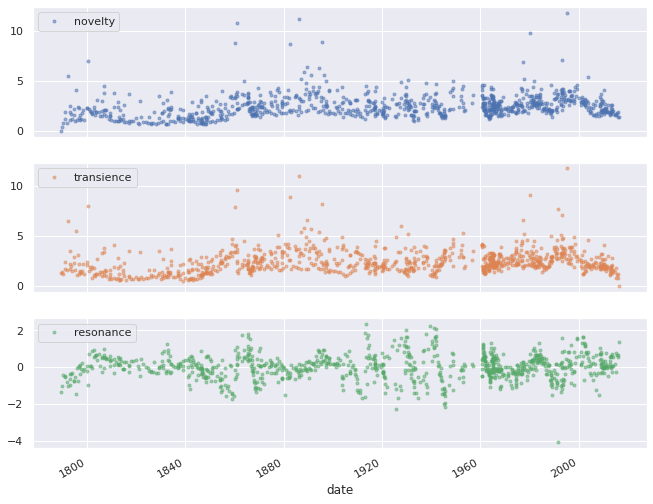

In [277]:
ts[plot_cols].plot(
    marker='.', 
    alpha=.5,
    linestyle='None',
    figsize=(11, 9),
    subplots=True)

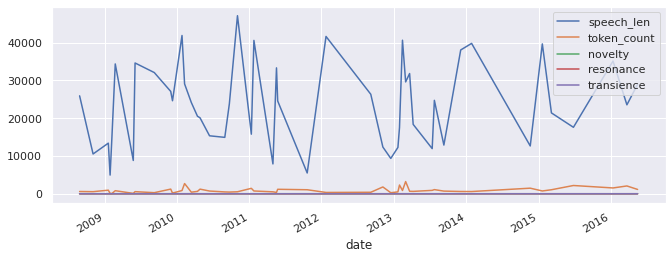

In [278]:
ts.query('speaker == "obama"').plot()

In [279]:
# monthly resampling, 

ts_monthly = ts.resample('M').max() #mean or other aggregate

AssertionError: 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bde26ef28>,
      dtype=object)

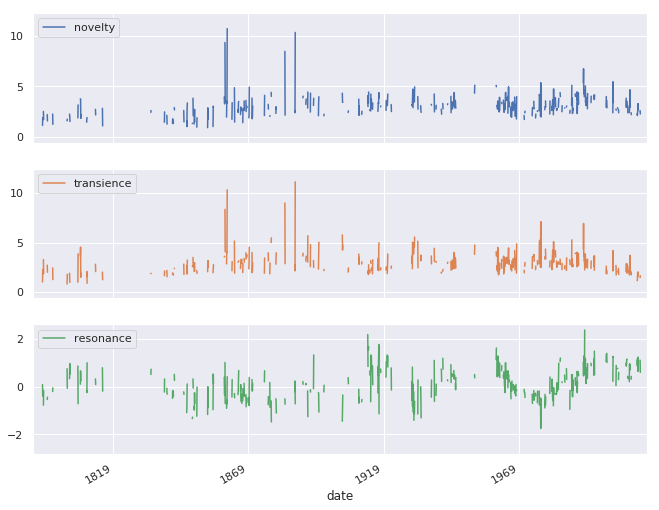

In [57]:
ts_monthly.plot(
    #marker='.',
    #linestyle='None',
    figsize=(11, 9),
    subplots=True)